In [1]:
pip install tensorflow-gpu

     |████████████████████████████████| 377.0MB 78kB/s 


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"norihisa","key":"d016ea67c3249f44d2090f6c16a2ade1"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!pip install kaggle

In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d olgabelitskaya/style-color-images

 89% 122M/138M [00:01<00:00, 74.3MB/s]
100% 138M/138M [00:01<00:00, 98.3MB/s]


In [7]:
!unzip style-color-images.zip

Archive:  style-color-images.zip
  inflating: StyleColorImages.h5     
  inflating: style.zip               


In [8]:
!unzip style.zip

Archive:  style.zip
  inflating: 0_0_001.png             
   creating: __MACOSX/
  inflating: __MACOSX/._0_0_001.png  
  inflating: 0_0_002.png             
  inflating: __MACOSX/._0_0_002.png  
  inflating: 0_0_003.png             
  inflating: __MACOSX/._0_0_003.png  
  inflating: 0_0_004.png             
  inflating: __MACOSX/._0_0_004.png  
  inflating: 0_0_005.png             
  inflating: __MACOSX/._0_0_005.png  
  inflating: 0_0_006.png             
  inflating: __MACOSX/._0_0_006.png  
  inflating: 0_0_007.png             
  inflating: __MACOSX/._0_0_007.png  
  inflating: 0_0_008.png             
  inflating: __MACOSX/._0_0_008.png  
  inflating: 0_0_009.png             
  inflating: __MACOSX/._0_0_009.png  
  inflating: 0_0_010.png             
  inflating: __MACOSX/._0_0_010.png  
  inflating: 0_0_011.png             
  inflating: __MACOSX/._0_0_011.png  
  inflating: 0_0_012.png             
  inflating: __MACOSX/._0_0_012.png  
  inflating: 0_0_013.png             
  infla

In [0]:
!mkdir style

In [0]:
mv *.png style

In [11]:
from keras.applications import vgg16
from keras.preprocessing.image import load_img,img_to_array
from keras.models import Model
from keras.applications.imagenet_utils import preprocess_input

from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

Using TensorFlow backend.


In [0]:
files = ['/content/style/' + x for x in os.listdir('/content/style/') if "png" in x]

In [0]:
imgs_path = "../input/style/"
imgs_model_width, imgs_model_height = 224, 224

nb_closest_images = 5

In [14]:
vgg_model = vgg16.VGG16(weights='imagenet')

# remove the last layers in order to get features instead of predictions
feat_extractor = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer("fc2").output)

# print the layers of the CNN
feat_extractor.summary()

W0730 08:17:41.939621 139934039041920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0730 08:17:41.955390 139934039041920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0730 08:17:41.958595 139934039041920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0730 08:17:41.986917 139934039041920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



553467904/553467096 [==============================] - 6s 0us/step


W0730 08:17:49.387363 139934039041920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0730 08:17:49.388879 139934039041920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
importedImages = []

for f in files:
    filename = f
    original = load_img(filename, target_size=(224, 224))
    numpy_image = img_to_array(original)
    image_batch = np.expand_dims(numpy_image, axis=0)
    
    importedImages.append(image_batch)
    
images = np.vstack(importedImages)

processed_imgs = preprocess_input(images.copy())

In [16]:
imgs_features = feat_extractor.predict(processed_imgs)

print("features successfully extracted!")
imgs_features.shape

features successfully extracted!


(2184, 4096)

In [17]:
cosSimilarities = cosine_similarity(imgs_features)

# store the results into a pandas dataframe

cos_similarities_df = pd.DataFrame(cosSimilarities, columns=files, index=files)
cos_similarities_df.head()

,/content/style/3_2_038.png,/content/style/1_2_047.png,/content/style/3_0_009.png,/content/style/1_8_022.png,/content/style/1_2_053.png,/content/style/4_1_002.png,/content/style/1_5_009.png,/content/style/5_2_002.png,/content/style/2_1_029.png,/content/style/4_6_001.png,/content/style/6_2_011.png,/content/style/1_1_001.png,/content/style/6_8_019.png,/content/style/3_5_018.png,/content/style/1_2_040.png,/content/style/5_2_050.png,/content/style/0_0_055.png,/content/style/2_4_006.png,/content/style/4_1_008.png,/content/style/1_3_001.png,/content/style/2_0_001.png,/content/style/0_8_019.png,/content/style/4_0_039.png,/content/style/1_9_002.png,/content/style/5_0_012.png,/content/style/1_4_019.png,/content/style/1_4_010.png,/content/style/2_0_011.png,/content/style/1_4_022.png,/content/style/6_0_018.png,/content/style/3_5_014.png,/content/style/6_1_025.png,/content/style/2_8_011.png,/content/style/1_0_028.png,/content/style/3_0_064.png,/content/style/3_0_023.png,/content/style/2_8_016.png,/content/style/6_0_011.png,/content/style/4_2_002.png,/content/style/4_6_041.png,...,/content/style/1_7_018.png,/content/style/4_2_069.png,/content/style/5_5_007.png,/content/style/3_6_036.png,/content/style/2_2_067.png,/content/style/2_2_059.png,/content/style/3_5_010.png,/content/style/4_1_015.png,/content/style/6_1_024.png,/content/style/6_4_001.png,/content/style/0_0_054.png,/content/style/3_6_012.png,/content/style/2_2_065.png,/content/style/4_7_014.png,/content/style/4_6_061.png,/content/style/1_5_018.png,/content/style/5_6_018.png,/content/style/1_8_015.png,/content/style/2_4_001.png,/content/style/4_9_007.png,/content/style/2_6_005.png,/content/style/2_0_007.png,/content/style/6_2_024.png,/content/style/2_1_003.png,/content/style/6_8_025.png,/content/style/6_1_039.png,/content/style/5_2_033.png,/content/style/2_2_022.png,/content/style/5_6_020.png,/content/style/6_2_029.png,/content/style/2_0_022.png,/content/style/1_9_001.png,/content/style/6_2_044.png,/content/style/6_2_006.png,/content/style/2_5_002.png,/content/style/1_2_055.png,/content/style/6_2_032.png,/content/style/4_6_011.png,/content/style/5_2_006.png,/content/style/1_4_027.png
/content/style/3_2_038.png,1.000000,0.465942,0.451254,0.476685,0.460179,0.272795,0.322069,0.436767,0.234887,0.391287,0.364453,0.256601,0.329286,0.294409,0.336310,0.430613,0.399815,0.210818,0.267784,0.267234,0.366005,0.360497,0.350471,0.211652,0.530167,0.338631,0.302385,0.352680,0.308312,0.347992,0.209392,0.251147,0.435148,0.424889,0.453755,0.421818,0.409454,0.419619,0.402889,0.323617,...,0.285069,0.473045,0.302754,0.328590,0.447118,0.390195,0.259505,0.231713,0.269692,0.320375,0.378440,0.291634,0.432843,0.268826,0.362574,0.294671,0.311713,0.232936,0.338283,0.209249,0.259676,0.344963,0.368689,0.206500,0.210367,0.238167,0.438241,0.170162,0.381755,0.409017,0.461490,0.403258,0.314854,0.307087,0.258972,0.441709,0.413880,0.373806,0.441685,0.251256
/content/style/1_2_047.png,0.465942,1.000000,0.364319,0.369645,0.623765,0.277820,0.288281,0.435833,0.268006,0.379002,0.355932,0.245495,0.371035,0.424002,0.292332,0.434190,0.234107,0.218030,0.276892,0.270242,0.291069,0.424693,0.191891,0.243446,0.543687,0.301510,0.348274,0.351139,0.325390,0.287074,0.264130,0.300748,0.318840,0.328682,0.357723,0.360788,0.303597,0.302439,0.434278,0.285378,...,0.264457,0.403089,0.309614,0.217733,0.619135,0.388963,0.289024,0.261968,0.243403,0.350885,0.259456,0.240926,0.436514,0.282015,0.314456,0.339899,0.283136,0.217951,0.253612,0.295653,0.276109,0.315032,0.477232,0.244014,0.282937,0.201146,0.408754,0.256651,0.380390,0.432478,0.291283,0.309538,0.337281,0.315572,0.297124,0.470362,0.466352,0.345270,0.413794,0.319307
/content/style/3_0_009.png,0.451254,0.364319,1.000000,0.459300,0.358935,0.317400,0.262600,0.275998,0.185569,0.391090,0.352648,0.201243,0.335087,0.300286,0.363325,0.341459,0.476194,0.113197,0.287897,0.194628,0.515742,0.356805,0.461174,0.185371,0.403112,0.345957,0.323170,0.475739,0.298046,0.463937,0.255142,0.179552,0.377267,0.490038,

In [0]:
def retrieve_most_similar_products(given_img):

    print("-----------------------------------------------------------------------")
    print("original product:")

    original = load_img(given_img, target_size=(imgs_model_width, imgs_model_height))
    plt.imshow(original)
    plt.show()

    print("-----------------------------------------------------------------------")
    print("most similar products:")

    closest_imgs = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1].index
    closest_imgs_scores = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1]

    for i in range(0,len(closest_imgs)):
        original = load_img(closest_imgs[i], target_size=(imgs_model_width, imgs_model_height))
        plt.imshow(original)
        plt.show()
        print("similarity score : ",closest_imgs_scores[i])

In [0]:
def n_retrieve_most_similar_products(given_img):

    print("-----------------------------------------------------------------------")
    print("original product:")

    original = load_img(given_img, target_size=(imgs_model_width, imgs_model_height))
    plt.imshow(original)
    plt.show()

    print("-----------------------------------------------------------------------")
    print("most similar products:")
    origin = load_img(given_img, target_size=(224, 224))
    numpy_image = img_to_array(origin)
    image_batch = np.expand_dims(numpy_image, axis=0)
    processed_img = preprocess_input(image_batch)
    imgs_feature = feat_extractor.predict(processed_img)
    imgs_features_2 = np.append(imgs_features, imgs_feature, axis=0)
    files_2 = files[:]
    files_2.append(given_img)
    print(len(files_2))
    cosSimilarities_2 = cosine_similarity(imgs_features_2)
    cos_similarities_df_2 = pd.DataFrame(cosSimilarities_2, columns=files_2, index=files_2)
    print(files_2[-1])
    
    closest_imgs = cos_similarities_df_2[given_img].sort_values(ascending=False)[1:nb_closest_images+1].index
    closest_imgs_scores = cos_similarities_df_2[given_img].sort_values(ascending=False)[1:nb_closest_images+1]

    for i in range(0,len(closest_imgs)):
        original = load_img(closest_imgs[i], target_size=(imgs_model_width, imgs_model_height))
        plt.imshow(original)
        plt.show()
        print("similarity score : ",closest_imgs_scores[i])

-----------------------------------------------------------------------
original product:


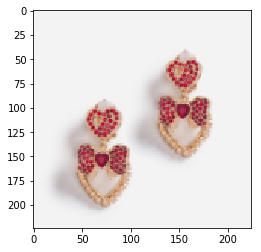

-----------------------------------------------------------------------
most similar products:


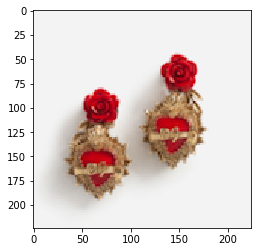

similarity score :  0.8469039


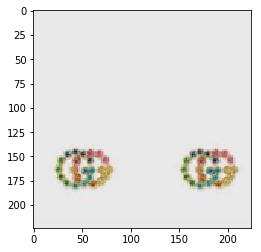

similarity score :  0.7319034


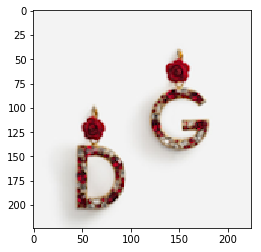

similarity score :  0.72245485


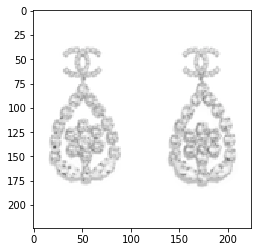

similarity score :  0.69350386


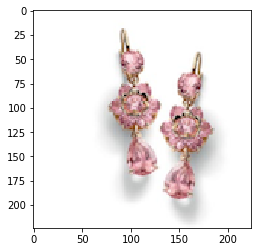

similarity score :  0.6869409


In [65]:
retrieve_most_similar_products(files[380])

In [0]:
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
import pandas as pd
import os, shutil
%matplotlib inline

In [0]:
kmeans = KMeans(n_clusters=10)
clustered_num = kmeans.fit_predict(imgs_features)

In [0]:
for x, y in zip(files, clustered_num):
  if os.path.exists('/content/folder' + str(y)):
    shutil.copy(x, '/content/folder' + str(y))
  else:
    os.mkdir('/content/folder' + str(y))
    shutil.copy(x, '/content/folder' + str(y))

In [0]:
for n in range(7):
  shutil.rmtree('/content/folder' + str(n))

In [26]:
for n in range(10):
  names = os.listdir('/content/folder' + str(n))
  lis = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
  for name in names:
    s = int(str(name)[2])
    lis[s] += 1
  plt.bar(range(10), lis)
  print('----------folder ' + str(n) + '----------')
  plt.show()

FileNotFoundError: ignored

In [42]:
for i in range(10):
  shutil.rmtree('/content/folder' + str(i))

FileNotFoundError: ignored

#*Autoencoder*

In [0]:
from keras.layers import Input, Dense, Convolution2D, MaxPooling2D, UpSampling2D, Flatten, Reshape, Conv2D, BatchNormalization
from keras.models import Model
from keras import backend as K
from keras.callbacks import ModelCheckpoint

In [0]:
import numpy as np
import cv2

In [0]:
def autoencoder(act='relu', init='glorot_uniform'):
    """
    Fully connected auto-encoder model, symmetric.
    Arguments:
        dims: list of number of units in each layer of encoder. dims[0] is input dim, dims[-1] is units in hidden layer.
            The decoder is symmetric with encoder. So number of layers of the auto-encoder is 2*len(dims)-1
        act: activation, not applied to Input, Hidden and Output layers
    return:
        (ae_model, encoder_model), Model of autoencoder and model of encoder
    """
    input_img = Input(shape=(28, 28, 3)) 

    x = Convolution2D(16, (3, 3), activation='relu', padding='same')(input_img)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2), border_mode='same')(x)
    x = Convolution2D(8, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Convolution2D(8, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Convolution2D(16, (3, 3), activation='relu', padding='same')(input_img)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2), border_mode='same')(x)
    x = Convolution2D(8, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Convolution2D(8, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    #x = MaxPooling2D((2, 2), padding='same')(x)

    x = Flatten()(x)
    x = Dense(7*7*8, activation="relu")(x)
    encoded = Dense(10, activation="relu")(x)


    x = Dense(7*7*8, activation="relu")(encoded)
    x = Reshape(target_shape=(7,7,8))(x) 
    x = Convolution2D(8, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = UpSampling2D((2, 2))(x)
    x = Convolution2D(8, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = UpSampling2D((2, 2))(x)
    x = Convolution2D(8, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    #x = UpSampling2D((2, 2))(x)
    x = Convolution2D(8, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    #x = UpSampling2D((2, 2))(x)


    decoded = Convolution2D(3, (3, 3), activation='relu', padding='same')(x) 
    #x = UpSampling2D((2, 2))(x)
    #decoded = Convolution2D(1, (3, 3), activation='sigmoid', padding='same')(x)
    return Model(inputs=input_img, outputs=encoded, name='encoder'), Model(inputs=input_img, outputs=decoded, name='AE')
#CAEモデル作成

encoder, autoencoder = autoencoder()
autoencoder.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

filepath="weights-improvement-{epoch:02d}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D((2, 2), padding="same")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D((2, 2), padding="same")`


In [0]:
def autoencoder(act='relu', init='glorot_uniform'):
    """
    Fully connected auto-encoder model, symmetric.
    Arguments:
        dims: list of number of units in each layer of encoder. dims[0] is input dim, dims[-1] is units in hidden layer.
            The decoder is symmetric with encoder. So number of layers of the auto-encoder is 2*len(dims)-1
        act: activation, not applied to Input, Hidden and Output layers
    return:
        (ae_model, encoder_model), Model of autoencoder and model of encoder
    """
    input_img = Input(shape=(164, 164, 3)) 

    x = Convolution2D(8, (3, 3), activation='relu', padding='same')(input_img)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2), border_mode='same')(x)
    x = Convolution2D(8, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Convolution2D(8, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Convolution2D(4, (3, 3), activation='relu', padding='same')(x)
    encoded = BatchNormalization()(x)
    #x = MaxPooling2D((2, 2), padding='same')(x)

    #x = Flatten()(x)
    #x = Dense(19*19*4, activation="relu")(x)
    #encoded = Dense(784, activation="relu")(x)


    #x = Dense(19*19*4, activation="relu")(encoded)
    #x = Reshape(target_shape=(19,19,4))(x) 
    x = Convolution2D(8, (3, 3), activation='relu', padding='same')(encoded)
    x = BatchNormalization()(x)
    x = UpSampling2D((2, 2))(x)
    x = Convolution2D(8, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = UpSampling2D((2, 2))(x)
    x = Convolution2D(8, (3, 3), activation='relu')(x)
    x = BatchNormalization()(x)
    x = UpSampling2D((2, 2))(x)


    decoded = Convolution2D(3, (3, 3), activation='sigmoid', padding='same')(x) 
    #x = UpSampling2D((2, 2))(x)
    #decoded = Convolution2D(1, (3, 3), activation='sigmoid', padding='same')(x)
    return Model(inputs=input_img, outputs=encoded, name='encoder'), Model(inputs=input_img, outputs=decoded, name='AE')
#CAEモデル作成

encoder, autoencoder = autoencoder()
autoencoder.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

filepath="weights-improvement-{epoch:02d}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D((2, 2), padding="same")`
  from ipykernel import kernelapp as app


In [0]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 164, 164, 3)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 164, 164, 16)      448       
_________________________________________________________________
batch_normalization_15 (Batc (None, 164, 164, 16)      64        
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 82, 82, 16)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 82, 82, 8)         1160      
_________________________________________________________________
batch_normalization_16 (Batc (None, 82, 82, 8)         32        
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 41, 41, 8)         0         
__________

In [0]:
from keras.preprocessing.image import ImageDataGenerator, image
data_gene = ImageDataGenerator(rescale=1./255)

In [0]:
os.mkdir('/content/style2')
os.mkdir('/content/style2/data0')

In [0]:
for file in files:
  shutil.copy(file, '/content/style2/data0')

In [0]:
fashion_gen = data_gene.flow_from_directory(
  '/content/style2',
  target_size=(164, 164),
  batch_size=20,
  class_mode='input')

Found 2184 images belonging to 1 classes.


In [0]:
history = autoencoder.fit_generator(fashion_gen,
                                   steps_per_epoch=100,
                                   epochs=30)

Epoch 1/30
100/100 [==============================] - 5s 52ms/step - loss: 0.5340 - acc: 0.2160
Epoch 2/30
100/100 [==============================] - 3s 34ms/step - loss: 0.4063 - acc: 0.2274
Epoch 3/30
100/100 [==============================] - 3s 33ms/step - loss: 0.3478 - acc: 0.2346
Epoch 4/30
100/100 [==============================] - 3s 33ms/step - loss: 0.3413 - acc: 0.2342
Epoch 5/30
100/100 [==============================] - 3s 33ms/step - loss: 0.3443 - acc: 0.2324
Epoch 6/30
100/100 [==============================] - 3s 34ms/step - loss: 0.3383 - acc: 0.2291
Epoch 7/30
100/100 [==============================] - 3s 33ms/step - loss: 0.3363 - acc: 0.2265
Epoch 8/30
100/100 [==============================] - 3s 33ms/step - loss: 0.3303 - acc: 0.2299
Epoch 9/30
100/100 [==============================] - 3s 34ms/step - loss: 0.3293 - acc: 0.2299
Epoch 10/30
100/100 [==============================] - 3s 33ms/step - loss: 0.3286 - acc: 0.2366
Epoch 11/30
100/100 [==================

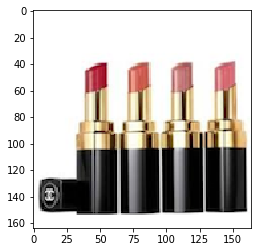

In [0]:
img = image.load_img('/content/style2/data0/1_1_008.png', target_size=(164, 164))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
plt.imshow(img_tensor[0])

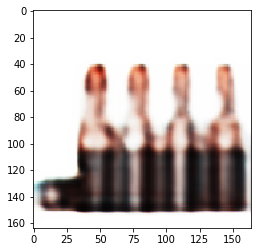

In [0]:
decoded_img = autoencoder.predict(img_tensor)
plt.imshow(decoded_img[0])

W0725 04:10:28.098880 140670280152960 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


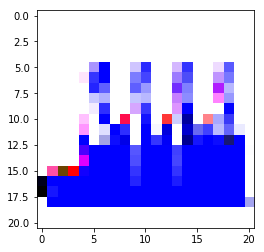

In [0]:
encoded_img = encoder.predict(img_tensor)
plt.imshow(encoded_img[0])

In [0]:
num_lis = []
for file in files:
  img = image.load_img(file, target_size=(164, 164))
  img_tensor = image.img_to_array(img)
  img_tensor /= 255.
  num_lis.append(img_tensor)
img_array = np.array(num_lis)
img_array.shape

(2184, 164, 164, 3)

In [0]:
encoded_images = encoder.predict(img_array)
# Cluster the training set
kmeans = KMeans(n_clusters=10)
p_encoded = encoded_images.reshape(2184, -1)
clustered_num_auto = kmeans.fit_predict(p_encoded)

In [0]:
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
import pandas as pd
import os, shutil
%matplotlib inline

In [0]:
for x, y in zip(files, clustered_num_auto):
  if os.path.exists('/content/folder' + str(y)):
    shutil.copy(x, '/content/folder' + str(y))
  else:
    os.mkdir('/content/folder' + str(y))
    shutil.copy(x, '/content/folder' + str(y))

----------folder 0----------


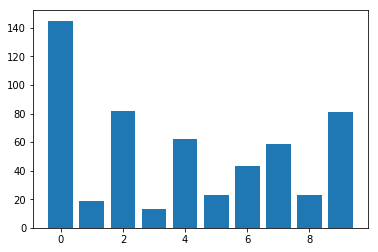

----------folder 1----------


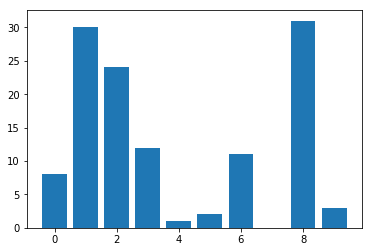

----------folder 2----------


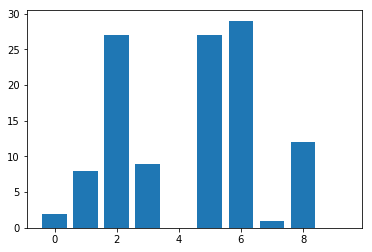

----------folder 3----------


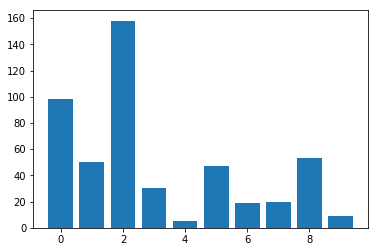

----------folder 4----------


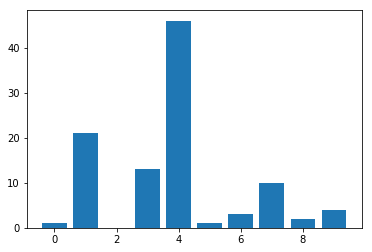

----------folder 5----------


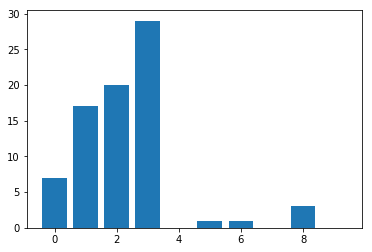

----------folder 6----------


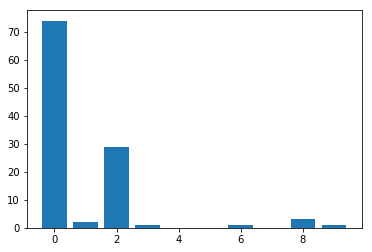

----------folder 7----------


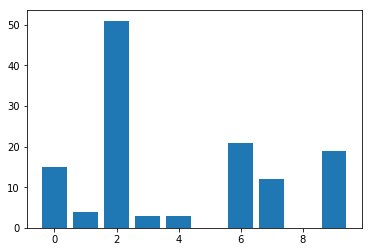

----------folder 8----------


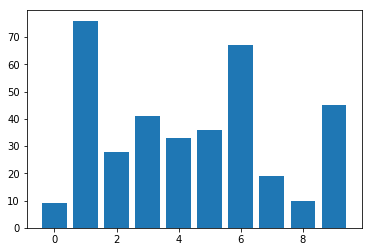

----------folder 9----------


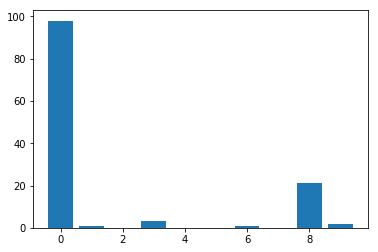

In [0]:
for n in range(10):
  names = os.listdir('/content/folder' + str(n))
  lis = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
  for name in names:
    s = int(str(name)[2])
    lis[s] += 1
  plt.bar(range(10), lis)
  print('----------folder ' + str(n) + '----------')
  plt.show()